TODO:
* [ ] Balance initial variables - In convergent state neurons should only be dominated by noise
* [ ] Fix unexpected initial steep jumps
* [ ] Fix noise input - it should have larger effect on the rate. Calculate how much exactly
* [ ] Implement variance into statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from lib.single_population_rate import SinglePopulationRate
from lib.aux import subplots1D

%load_ext autoreload

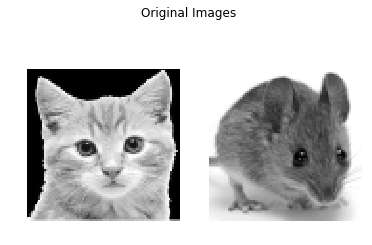

In [2]:
# Load raw images
# img1 = (mpimg.imread('img/cat3.png')[:,:,0] > 0.5).astype(int)
# img2 = (mpimg.imread('img/mouse3.png')[:,:,0] > 0.5).astype(int)
img1 = mpimg.imread('img/cat4.png')
img2 = mpimg.imread('img/mouse4.png')

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(img1, cmap='gray')
axis[1].imshow(img2, cmap='gray')
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images');

Number of neurons is 6400
Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 1000 {'State': 0.32, 'IP': 0.02, 'STDP': 0, 'STAT': 0.06, 'UPDATE': 0.0}
Doing step 2000 {'State': 0.63, 'IP': 0.04, 'STDP': 0, 'STAT': 0.12, 'UPDATE': 0.0}


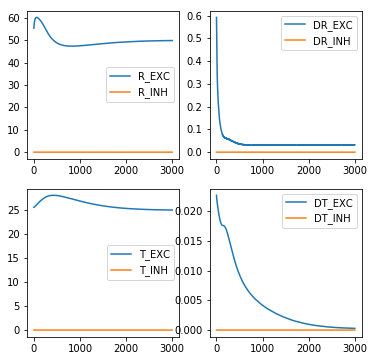

In [3]:
############################################
# Initialize a network with no synapses
############################################
N_NEURON = img1.shape[0] * img1.shape[1]
print('Number of neurons is', N_NEURON)

param = {
    'N_EXC' : N_NEURON,
    'N_INH' : 0,
    
    'V0_EXC' : 0.0, # mv
    'V0_INH' : 0.0, # mv
    
    'R_RANGE_EXC' : [10.0, 100.0], #Hz
    'R_RANGE_INH' : [10.0, 100.0], #Hz

    'T_RANGE_EXC' : [1.0, 50.0], # mVolt
    'T_RANGE_INH' : [1.0, 50.0], # mVolt
    
    'TAU_NEURON_RELAX_EXC' : 10.0, # ms
    'TAU_NEURON_RELAX_INH' : 10.0, # ms
    
    'HP_RATE_EXC' : 0.01,
    'HP_RATE_INH' : 0.01,
    'R_EQ_EXC' : 50.0, # Hz
    'R_EQ_INH' : 50.0, # Hz
    
    'W_INPUT_EXC' : 10, # mVolt per presynaptic spike
    'W_INPUT_INH' : 10, # mVolt per presynaptic spike

    'WITH_SYNAPSES' : False
}

spd1 = SinglePopulationRate(param)

INPUT_RATE = 100.0 # Hz


############################################
# Run the network with no input, only noise
############################################
VI_MAT_NOISE = np.zeros((3000, N_NEURON))

param_sim_noise = {
    'DT'             : 0.1,    #ms
    'WITH_IP'        : True,
    'WITH_SP'        : False,
    'SOMA_NOISE_EXC' : [1000.0, 100.0],  # Hz
    'SOMA_NOISE_INH' : [1000.0, 100.0]   # Hz
}

spd1.run(VI_MAT_NOISE, param_sim_noise, timefreq=1000)

# Plot network indicators
plotStruct = np.array([
    [['R_EXC', 'R_INH'], ['DR_EXC', 'DR_INH']],
    [['T_EXC', 'T_INH'], ['DT_EXC', 'DT_INH']]
#     [['W_EXC_EXC', 'W_EXC_INH', 'W_INH_EXC', 'W_INH_INH'],
#     ['DW_EXC_EXC', 'DW_EXC_INH', 'DW_INH_EXC', 'DW_INH_INH']]
])

subplots1D(spd1.statsDict, plotStruct)

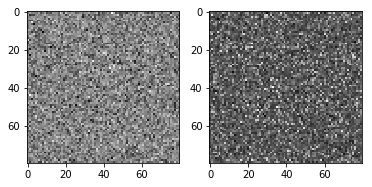

In [4]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.v['R_EXC'].reshape(img1.shape), cmap='gray')
ax[1].imshow(spd1.v['T_EXC'].reshape(img1.shape), cmap='gray')
plt.show()

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 1000 {'State': 0.31, 'IP': 0.02, 'STDP': 0, 'STAT': 0.06, 'UPDATE': 0.0}
Doing step 2000 {'State': 0.63, 'IP': 0.04, 'STDP': 0, 'STAT': 0.13, 'UPDATE': 0.0}
Doing step 3000 {'State': 0.97, 'IP': 0.07, 'STDP': 0, 'STAT': 0.2, 'UPDATE': 0.0}
Doing step 4000 {'State': 1.3, 'IP': 0.09, 'STDP': 0, 'STAT': 0.27, 'UPDATE': 0.0}


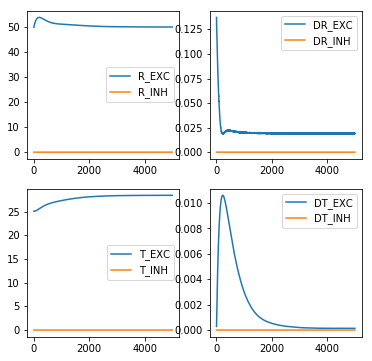

In [5]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_CAT = np.tile(np.ndarray.flatten(img1), (5000, 1)) * INPUT_RATE

param_sim_img = {
    'DT'            : 0.1,    #ms
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'SOMA_NOISE_EXC' : [600.0, 60.0],
    'SOMA_NOISE_INH' : [600.0, 60.0]
}

spd1.run(VI_MAT_CAT, param_sim_img, timefreq=1000)

subplots1D(spd1.statsDict, plotStruct)

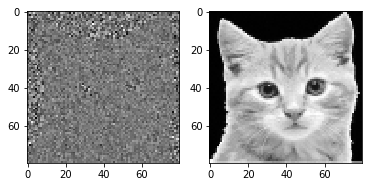

In [6]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.v['R_EXC'].reshape(img1.shape), cmap='gray')
ax[1].imshow(spd1.v['T_EXC'].reshape(img1.shape), cmap='gray')
plt.show()

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 1000 {'State': 0.31, 'IP': 0.02, 'STDP': 0, 'STAT': 0.07, 'UPDATE': 0.0}
Doing step 2000 {'State': 0.64, 'IP': 0.05, 'STDP': 0, 'STAT': 0.14, 'UPDATE': 0.0}


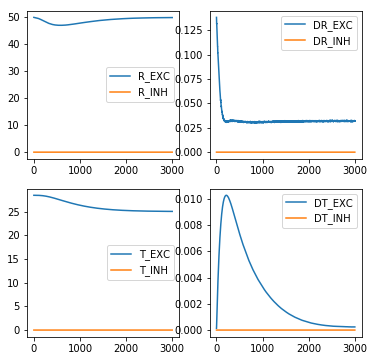

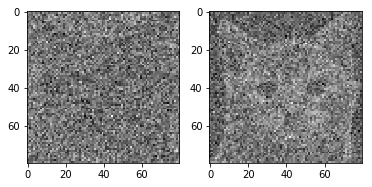

Doing step 0 {'State': 0, 'IP': 0, 'STDP': 0, 'STAT': 0, 'UPDATE': 0}
Doing step 1000 {'State': 0.34, 'IP': 0.02, 'STDP': 0, 'STAT': 0.07, 'UPDATE': 0.0}
Doing step 2000 {'State': 0.67, 'IP': 0.05, 'STDP': 0, 'STAT': 0.14, 'UPDATE': 0.0}
Doing step 3000 {'State': 1.01, 'IP': 0.07, 'STDP': 0, 'STAT': 0.22, 'UPDATE': 0.0}
Doing step 4000 {'State': 1.34, 'IP': 0.1, 'STDP': 0, 'STAT': 0.28, 'UPDATE': 0.0}


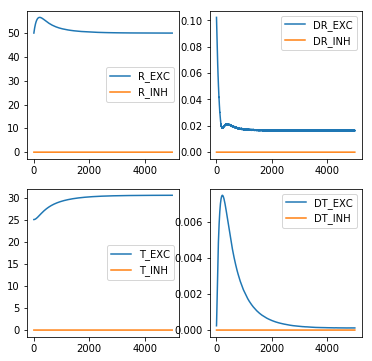

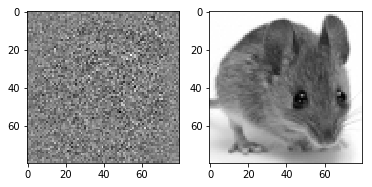

In [7]:
############################################
# Show more noise, then show more 
############################################

VI_MAT_MOUSE = np.tile(np.ndarray.flatten(img2), (5000, 1)) * INPUT_RATE

spd1.run(VI_MAT_NOISE, param_sim_noise, timefreq=1000)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.v['R_EXC'].reshape(img1.shape), cmap='gray')
ax[1].imshow(spd1.v['T_EXC'].reshape(img1.shape), cmap='gray')
plt.show()

spd1.run(VI_MAT_MOUSE, param_sim_img, timefreq=1000)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.v['R_EXC'].reshape(img1.shape), cmap='gray')
ax[1].imshow(spd1.v['T_EXC'].reshape(img1.shape), cmap='gray')
plt.show()